## 處理XML 資料

In [3]:
import xml.etree.ElementTree as ET
tree = ET.parse('1.NBAGIR070_A20160908164642.xml')
root = tree.getroot()

In [5]:
root

<Element 'GenericData' at 0x3cf8400>

In [6]:
ds = root.find('DataSet')

In [8]:
ds

<Element 'DataSet' at 0x3c66a90>

In [22]:
for row in ds.iter('ROW'):
    print row.find('SEQNO').text,\
          row.find('LEVEL').text,\
          row.find(u'科目-名稱').text,\
          row.find(u'本月份預算數').text  

1 01 基金來源 850000.00
2 02 徵收及依法分配收入 850000.00
3 03 違規罰款收入 850000.00
4 02 財產收入 None
5 03 利息收入 None
6 01 基金用途 617000.00
7 01 本期賸餘(短絀-) 233000.00
8 01 期末基金餘額 None


In [27]:
bond_list = []
for row in ds.iter('ROW'):
    bond_dic = {}
    for child in row:
        bond_dic[child.tag] = child.text
    bond_list.append(bond_dic)

In [29]:
import pandas as pd
df = pd.DataFrame(bond_list)
df

,BOLD,LEVEL,SEQNO,本年度截至本月份累計實際數,本年度截至本月份累計比較增減,本年度截至本月份累計比較增減-百分比,本年度截至本月份累計預算數,本年度法定預算數,本月份實際數,本月份比較增減,本月份比較增減-百分比,本月份預算數,科目-名稱,科目-編號
0,1,01,1,217463130.00,211973130.00,3861.08,5490000.00,12000000.00,4821000.00,3971000.00,467.18,850000.00,基金來源,4
1,1,02,2,217458000.00,211968000.00,3860.98,5490000.00,12000000.00,4821000.00,3971000.00,467.18,850000.00,徵收及依法分配收入,41
2,1,03,3,217458000.00,211968000.00,3860.98,5490000.00,12000000.00,4821000.00,3971000.00,467.18,850000.00,違規罰款收入,415
3,1,02,4,5130.00,5130.00,None,None,None,None,None,None,None,財產收入,45
4,1,03,5,5130.00,5130.00,None,None,None,None,None,None,None,利息收入,454
5,1,01,6,4155992.00,198992.00,5.03,3957000.00,10000000.00,603503.00,-13497.00,-2.19,617000.00,基金用途,5
6,1,01,7,213307138.00,211774138.00,13814.36,1533000.00,2000000.00,4217497.00,3984497.00,1710.08,233000.00,本期賸餘(短絀-),6
7,1,01,8,213307138.00,211774138.00,13814.36,1533000.00,2000000.00,None,None,None,None,期末基金餘額,73


In [32]:
df.to_csv('bond.csv', encoding= 'utf-8')
df.to_excel('bond.xlsx')

In [20]:
a = '在黄山始信峰附近，澎湃新闻发现部分游客裸露上身游览景区\
，还有一些游客不顾警示牌警告攀爬峭壁。而在黄山前山及飞来石附近\
一处休息区，一些游客将石榴皮随意丢弃，还有游客用手杖打松树果。'
# \ 一定要放在最後面
print a

在黄山始信峰附近，澎湃新闻发现部分游客裸露上身游览景区，还有一些游客不顾警示牌警告攀爬峭壁。而在黄山前山及飞来石附近一处休息区，一些游客将石榴皮随意丢弃，还有游客用手杖打松树果。


In [17]:
print ['科目-名稱']
print [u'科目-名稱']

['\xe7\xa7\x91\xe7\x9b\xae-\xe5\x90\x8d\xe7\xa8\xb1']
[u'\u79d1\u76ee-\u540d\u7a31']


## 讀取目錄夾下所有的XML 檔案

In [34]:
import os
import xml.etree.ElementTree as ET
bond_list = []

for xmlfile in os.listdir('xmldata'):
    tree = ET.parse('xmldata/' + xmlfile)
    root = tree.getroot()
    ds = root.find('DataSet')
    for row in ds.iter('ROW'):
        bond_dic = {}
        for child in row:
            bond_dic[child.tag] = child.text
        bond_list.append(bond_dic)

In [36]:
import pandas as pd
df = pd.DataFrame(bond_list)
df.to_excel('bond2.xlsx')

## 處理JSON 資料

In [48]:
import requests
payload = {
'parentId':'1003',
'lon':'121.5181',
'lat':'25.0410'  
}
res = requests.post('http://fscmobile.fsc.gov.tw/FscWebs/services/getFinanceInfos', data = payload)
#print res.text

In [49]:
import json
jd = json.loads(res.text)

In [53]:
for finance in jd['financeInfos']:
    title, addr, tel = finance['title'],finance['addr'],finance['tel']
    #print title, addr, tel

In [54]:
import pandas
df = pandas.DataFrame(jd['financeInfos'])
df.head()

,addr,distance,fax,id,idNumber,lat,lon,picUrl,tel,title,url
0,台北市中正區中山南路7號地下1樓,0.19140462862023078,,10030131414,0061346,25.04041,121.51988,http://163.29.133.20:8080/FscWs/images/1_ICON.png,02-23568071,合作金庫商業銀行台大分行,http://www.tcb-bank.com.tw
1,凱達格蘭大道2號129室,0.28884717223771683,,10030211219,0170860,25.038946,121.51635,http://163.29.133.20:8080/FscWs/images/1_ICON.png,02-23482066,兆豐國際商銀駐外交部簡易型分行,http://www.megabank.com.tw
2,台北市中正區襄陽路1號一、二樓,0.32562426633459907,,10031134190,8050023,25.043497,121.51642,http://163.29.133.20:8080/FscWs/images/1_ICON.png,02-23814567,遠東國際商業銀行台北襄陽分行,http://www.feib.com.tw
3,台北市襄陽路1號5樓,0.32562426633459907,,10031134199,8050126,25.043497,121.51642,http://163.29.133.20:8080/FscWs/images/1_ICON.png,02-23123636,遠東國際商業銀行信託部,http://www.feib.com.tw
4,台北市中正區中山南路一號一樓及地下一樓,0.3517530794964405,,1003008997,0041621,25.043894,121.5195,http://163.29.133.20:8080/FscWs/images/1_ICON.png,02-23411001,臺灣銀行群賢分行,http://www.bot.com.tw


In [51]:
df.count()

addr        3597
distance    3597
fax         3597
id          3597
idNumber    3597
lat         3597
lon         3597
picUrl      3597
tel         3597
title       3597
url         3597
dtype: int64

In [55]:
df.to_excel('bank.xlsx')

In [56]:
df.to_csv('bank.csv',encoding='utf-8')

In [71]:
bank = '合作金庫商業銀行台大分行'
print bank.split('銀行')[0] + '銀行'

bank2 = '兆豐國際商銀駐外交部簡易型分行'
print bank2.split('商銀')[0] + '商銀'


banks = ['合作金庫商業銀行台大分行', '兆豐國際商銀駐外交部簡易型分行']
import re
for b in banks:
    print re.split('銀行|商銀', b)[0]

合作金庫商業銀行
兆豐國際商銀
合作金庫商業
兆豐國際


In [75]:
import pandas
import re
df = pandas.DataFrame(jd['financeInfos'])
df['branch'] = df['title'].map(lambda e: re.split(u'銀行|商銀', e)[0])
df.head()

,addr,distance,fax,id,idNumber,lat,lon,picUrl,tel,title,url,branch
0,台北市中正區中山南路7號地下1樓,0.19140462862023078,,10030131414,0061346,25.04041,121.51988,http://163.29.133.20:8080/FscWs/images/1_ICON.png,02-23568071,合作金庫商業銀行台大分行,http://www.tcb-bank.com.tw,合作金庫商業
1,凱達格蘭大道2號129室,0.28884717223771683,,10030211219,0170860,25.038946,121.51635,http://163.29.133.20:8080/FscWs/images/1_ICON.png,02-23482066,兆豐國際商銀駐外交部簡易型分行,http://www.megabank.com.tw,兆豐國際
2,台北市中正區襄陽路1號一、二樓,0.32562426633459907,,10031134190,8050023,25.043497,121.51642,http://163.29.133.20:8080/FscWs/images/1_ICON.png,02-23814567,遠東國際商業銀行台北襄陽分行,http://www.feib.com.tw,遠東國際商業
3,台北市襄陽路1號5樓,0.32562426633459907,,10031134199,8050126,25.043497,121.51642,http://163.29.133.20:8080/FscWs/images/1_ICON.png,02-23123636,遠東國際商業銀行信託部,http://www.feib.com.tw,遠東國際商業
4,台北市中正區中山南路一號一樓及地下一樓,0.3517530794964405,,1003008997,0041621,25.043894,121.5195,http://163.29.133.20:8080/FscWs/images/1_ICON.png,02-23411001,臺灣銀行群賢分行,http://www.bot.com.tw,臺灣


## 處理CSV 資料

In [79]:
import pandas
df = pandas.read_csv('A_lvr_land_A2.CSV', encoding = 'big5')

In [81]:
df.head()

,鄉鎮市區,交易標的,土地區段位置或建物區門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價每平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,編號
0,文山區,房地(土地+建物)+車位,臺北市文山區羅斯福路五段236巷3弄31~60號,53.41,住,NaN,NaN,1050115,土地1建物1車位1,二層,...,1,有,有,29300000,151523.0,坡道平面,0.00,0,NaN,RPTNMLOJKHLFFAA27CA
1,文山區,房地(土地+建物)+車位,臺北市文山區指南路三段32巷1~30號,13.34,住,NaN,NaN,1050113,土地2建物1車位1,五層,...,1,有,有,9880000,150243.0,塔式車位,5.75,0,內含獨立產權車位未包含在棟數內含增建或未登記建物。,RPPNMLOJKHLFFAA86CA
2,文山區,房地(土地+建物)+車位,臺北市文山區政大二街260巷1~30號,123.49,住,NaN,NaN,1050121,土地1建物1車位2,五層，夾層,...,2,有,有,53329000,190570.0,坡道平面,51.89,4000000,NaN,RPVNMLMLKHLFFAA47CA
3,文山區,房地(土地+建物),臺北市文山區仙岩路16巷1~30號,34.73,住,NaN,NaN,1050106,土地4建物1車位0,三層,...,1,有,無,6000000,70423.0,NaN,0.00,0,受債權債務影響或債務抵償之交易。,RPXNMLNLKHLFFAA77CA
4,中正區,房地(土地+建物),臺北市中正區重慶南路三段16巷1~30號,42.13,住,NaN,NaN,1041208,土地2建物1車位0,四層,...,2,有,無,41000000,182628.0,NaN,0.00,0,本次價款不含車位，但權狀內登記有一個車位。,RPSNMLOLKHLFFAA37CA


In [82]:
df.describe()

C:\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,土地移轉總面積平方公尺,非都市土地使用分區,非都市土地使用編定,交易年月日,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元,單價每平方公尺,車位移轉總面積平方公尺,車位總價元
count,3169.000000,0.0,0.0,3.169000e+03,2.439000e+03,3169.000000,3169.000000,3169.000000,3169.000000,3.169000e+03,2.927000e+03,3169.000000,3.169000e+03
mean,50.800293,NaN,NaN,1.046957e+06,8.439693e+05,117.244418,1.922057,1.206374,1.233197,2.396605e+07,1.828752e+05,10.303888,4.421876e+05
std,290.243407,NaN,NaN,7.410411e+03,1.498355e+05,251.902454,3.372298,0.888164,3.234650,1.020623e+08,1.297473e+05,26.012910,1.375691e+06
min,0.000000,NaN,NaN,9.611230e+05,1.800000e+01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,8.570000,NaN,NaN,1.050102e+06,NaN,41.140000,0.000000,0.000000,0.000000,6.500000e+06,NaN,0.000000,0.000000e+00
50%,21.600000,NaN,NaN,1.050202e+06,NaN,87.260000,2.000000,1.000000,1.000000,1.310000e+07,NaN,0.000000,0.000000e+00
75%,35.600000,NaN,NaN,1.050309e+06,NaN,135.850000,3.000000,2.000000,2.000000,2.400000e+07,NaN,0.000000,0.000000e+00
max,11730.800000,NaN,NaN,1.050427e+06,1.050311e+06,8911.920000,168.000000,5.000000,174.000000,4.950000e+09,2.080354e+06,631.070000,2.065000e+07


In [89]:
print (1.828752 * 10e5 ) * 0.3025

553197.48


## 下載檔案

In [90]:
import requests 
import shutil
res = requests.get('http://plvr.land.moi.gov.tw/DownloadHistory?type=season&fileName=104S3', stream=True)
with open('104S3.zip', 'wb') as f:
    shutil.copyfileobj(res.raw, f)

## 下載電話圖檔

In [92]:
import requests
import shutil 
res = requests.get('https://statics.591.com.tw/tools/showPhone.php?txtcolor=black&info_data=quReZOkT%2FethF%2FeskWnZ%2BwJWOA&type=rLEFMu4XrrpgEw', stream=True)
with open('phone.png', 'wb') as f:
    shutil.copyfileobj(res.raw, f)

In [93]:
from PIL import Image
Image.open('phone.png')

## 安裝 pytesseract
- pip install pytesseract

In [4]:
from pytesseract import image_to_string
from PIL import Image
#print image_to_string(Image.open('phone.png'))

In [40]:
videourl = 'http://static8.pmadx.com/statics/materials/vpaid/VPAIDCreativePlugin-youku.swf?token=3ff228da033e0975a99954837cb55f55&pm_pid=100011&pm_media=youku&pm_platform=1&ClickThrough=&sid=pmdelivery&pm_duration=30&'

In [42]:
import requests
import shutil 

res = requests.get(videourl, stream=True)
with open('ppap.mp4', 'wb') as f:
    shutil.copyfileobj(res.raw, f)

## 各產業EPS統計資訊

In [43]:
import requests
payload= {
'encodeURIComponent':'1',
'step':'1',
'firstin':'1',
'TYPEK':'sii',
'code':'01',
'year':'103',
'season':'01'
}

res = requests.post('http://mops.twse.com.tw/mops/web/ajax_t163sb19', data = payload)
res.encoding = 'utf-8'
#print res.text

## HTML Table

<table>
    <tr><th> col1 </th><th> col2 </th></tr>
    <tr><td> 1 </td><td> 2 </td></tr>
    <tr><td> 1 </td><td> 2 </td></tr>
    <tr><td> 1 </td><td> 2 </td></tr>
    <tr><td> 1 </td><td> 2 </td></tr>
</table>

## 假設是使用BeautifulSoup 的做法 (不建議使用)

In [23]:
from bs4 import BeautifulSoup as bs
soup = bs(res.text)
table = soup.select('table')[0]
for tr in table.select('tr')[1:]:
    td = tr.select('td')
    print td[0].text, td[1].text, td[2].text

1101 台灣水泥股份有限公司 水泥工業
1102 亞洲水泥股份有限公司 水泥工業
1104 環球水泥股份有限公司 水泥工業
1109 信大水泥股份有限公司 水泥工業
1108 幸福水泥股份有限公司 水泥工業
1110 東南水泥股份有限公司 水泥工業


IndexError: list index out of range

## 使用Pandas

In [44]:
import pandas
dfs = pandas.read_html(res.text)

In [47]:
type(dfs)
len(dfs)

1

In [48]:
# 取得list 裡面第一個data frame
epsdf = dfs[0]

In [50]:
epsdf.iloc[0]

0         公司代號
1         公司名稱
2          產業別
3    基本每股盈餘(元)
4      普通股每股面額
5         營業收入
6         營業利益
7     營業外收入及支出
8         稅後淨利
Name: 0, dtype: object

In [54]:
# 先將欄位名稱改成第0列的資料
epsdf.columns = epsdf.loc[0]

In [55]:
# 抽取數字組成的公司代號
epsdf[u'公司代號'].str.match('^[0-9]+')

0     False
1      True
2      True
3      True
4      True
5      True
6      True
7     False
8      True
9     False
10    False
Name: 公司代號, dtype: bool

In [56]:
epsdata = epsdf[epsdf[u'公司代號'].str.match('^[0-9]+')]

In [57]:
epsdata.head()

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
1,1101,台灣水泥股份有限公司,水泥工業,0.50,新台幣 10.0000元,26716227,3684224,-133378,2791235
2,1102,亞洲水泥股份有限公司,水泥工業,0.47,新台幣 10.0000元,16256080,1637619,376460,1683231
3,1104,環球水泥股份有限公司,水泥工業,0.40,新台幣 10.0000元,1379161,47354,204613,240829
4,1109,信大水泥股份有限公司,水泥工業,0.20,新台幣 10.0000元,1192024,141243,-5246,107003
5,1108,幸福水泥股份有限公司,水泥工業,0.18,新台幣 10.0000元,1219347,102969,-16590,68510


In [38]:
epsdata.to_excel('eps.xlsx')

## 抓取多季的EPS 資訊

In [26]:
import requests
import pandas

payload= {
    'encodeURIComponent':'1',
    'step':'1',
    'firstin':'1',
    'TYPEK':'sii',
    'code':'01',
}

def getEPS(year, season):
    payload['year']   =  year
    payload['season'] =  season
    
    res = requests.post('http://mops.twse.com.tw/mops/web/ajax_t163sb19', data = payload)
    res.encoding = 'utf-8'

    dfs = pandas.read_html(res.text)
    
    # 取得list 裡面第一個data frame
    epsdf = dfs[0]
    epsdf.columns = epsdf.iloc[0]
    epsdata = epsdf[epsdf[u'公司代號'].str.match('^[0-9]+')]
    # 增添year 與 season 資訊
    epsdata['year'] = year
    epsdata['season'] = season
    return epsdata


df = getEPS(103, 3)
df

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利,year,season
1,1102,亞洲水泥股份有限公司,水泥工業,2.29,新台幣 10.0000元,57234891,5890621,3723693,8239271,103,3
2,1101,台灣水泥股份有限公司,水泥工業,2.23,新台幣 10.0000元,88684641,15166705,766761,12554416,103,3
4,1104,環球水泥股份有限公司,水泥工業,1.70,新台幣 10.0000元,4242326,131024,983212,1043688,103,3
6,1108,幸福水泥股份有限公司,水泥工業,0.76,新台幣 10.0000元,3732290,343590,15727,296111,103,3
7,1109,信大水泥股份有限公司,水泥工業,0.55,新台幣 10.0000元,3629205,360120,-3505,275242,103,3
8,1110,東南水泥股份有限公司,水泥工業,0.29,新台幣 10.0000元,1485757,95375,74315,168209,103,3
9,1103,嘉新水泥股份有限公司,水泥工業,0.23,新台幣 10.0000元,2818004,-207081,430012,191436,103,3


In [27]:
dftotal = []
season = [1,2,3,4]
for year in range(102, 105):
    for season in range(1,5):
        print year, season
        dftotal.append(getEPS(year, season))

102 1


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


102 2
102 3
102 4
103 1
103 2
103 3
103 4
104 1
104 2
104 3
104 4


In [29]:
stockdf = pandas.concat(dftotal)

In [33]:
stockdf.to_excel('stockeps.xlsx')

In [59]:
tw1101.head()

,基本每股盈餘(元),year,season,year_season
year_season,,,,
10201,0.38,102,1,10201
10202,1.08,102,2,10202
10203,2.06,102,3,10203
10204,2.72,102,4,10204
10301,0.50,103,1,10301


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


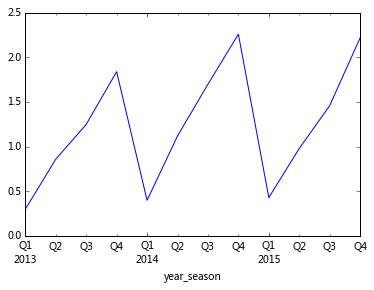

In [66]:
%pylab inline
from datetime import datetime
tw1101 = stockdf[stockdf[u'公司代號'] == '1104'][[u'基本每股盈餘(元)', 'year', 'season']]
tw1101['year_season'] = (tw1101['year']+1911) * 100 + tw1101['season'] * 3
tw1101['year_season']  = tw1101['year_season'].map(lambda ys: datetime.strptime(str(ys), '%Y%m'))
tw1101.index = tw1101['year_season']
tw1101[u'基本每股盈餘(元)'] = tw1101[u'基本每股盈餘(元)'].astype(float)
tw1101[u'基本每股盈餘(元)'].plot(kind='line')

## 三大法人買賣統計表

### 在Anaconda Prompt 下
- conda install lxml
- pip instasll html5lib==1.0b3

In [10]:
import requests
import pandas
res = requests.get('http://www.twse.com.tw/ch/trading/fund/BFI82U/BFI82U.php')
res.encoding = 'big5'

dfs = pandas.read_html(res.text)
stockdf = dfs[7]